# Assignment 7 - Exercise 2
## Due June 13th at 12:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

# Exercise 1

\begin{align*}
    \text{representer therorem:} \\
    w^* &= \sum_j \alpha_j \Phi(X_j) \\
    &\min_{w}\;\frac{1}{n}\sum_i \log(1+\exp(-Y_i \langle \Phi(X_i), w\rangle) \\
    \iff &\min_{\alpha}\; \frac{1}{n}\sum_i \log(1+\exp(-Y_i \langle \Phi(X_i), \sum_j \alpha_j \Phi(X_j)\rangle) \\
    \iff &\min_{\alpha}\; \frac{1}{n}\sum_i \log(1+\exp(-Y_i \sum_j \alpha_j \underbrace{\langle \Phi(X_i),  \Phi(X_j)\rangle}_{k_{ij}}) \\
    \iff &\min_{\alpha}\; \|\log(1+\exp(-YK\alpha))\| \\
\end{align*}

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# load the training data
df = pd.read_csv('train.csv')
X_train, y_train = df[['x', 'y']].to_numpy(), df[['label']].to_numpy().flatten()

X_train.shape=(100, 2)
y_train.shape=(100,)
X_train[0]=array([ 1.61383833, -0.49115086])
y_train[0]=1
np.unique(y_train, return_counts=True)=(array([0, 1]), array([50, 50]))


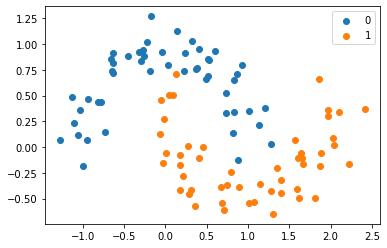

In [3]:
# Here you can inspect the data. This part will not be graded, but it is something that you should always do!
print(f"{X_train.shape=}")
print(f"{y_train.shape=}")
print(f"{X_train[0]=}")
print(f"{y_train[0]=}")
print(f"{np.unique(y_train, return_counts=True)=}")

fig, ax = plt.subplots()
ax.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1])
ax.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1])
ax.legend([0,1])
plt.show()

## a) Achieve zero training error


In [4]:
# put the values of hyperparameters for which overfitting happens into C and gamma
Cs = np.logspace(-7,5,200)
gammas = np.logspace(-7,5,200)

overfitting_Cs = []
overfitting_gammas = []
overfitting_params = []

for C in Cs:
    for gamma in gammas:
        overfit = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train, y_train)
        if overfit.score(X_train, y_train) == 1:
            if not C in overfitting_Cs:
                overfitting_Cs.append(C)
            if not gamma in overfitting_gammas:
                overfitting_gammas.append(gamma)
            overfitting_params.append({'C':C, 'gamma':gamma})

In [5]:
print("min Gamma:", np.min(overfitting_gammas))
print("max Gamma:", np.max(overfitting_gammas))
print("min C:", np.min(overfitting_Cs))
print("max C:", np.max(overfitting_Cs))

i = int(len(overfitting_params)/2)
C = overfitting_params[i]['C']
gamma = overfitting_params[i]['gamma']
overfitting_params[i]

min Gamma: 0.09329304026284677
max Gamma: 100000.0
min C: 1e-07
max C: 100000.0


{'C': 1.135733358343105, 'gamma': 55.42664520663096}

In [6]:
overfit = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train, y_train)
assert overfit.score(X_train, y_train) == 1

- **Qualitatively, what is the range of hyperparameters for which interpolation happens?:**  
    $\gamma \in [0.093, 10^5]$  
    $C \in [10^{-7}, 10^5]$  
    Although one has to be careful, because some Cs are only capable of overfitting with a smaller range of gammas and vice versa  
    Generally, the higher values of this range, seem to be more capable of overfitting

## b) Assuming that the kernel matrix is of full rank, can kernel SVM achieve zero training error on any dataset? Explain.

Yes, because the Kernel matrix has full rank, the Dimension of  the feature space is equal to the number of samples. Thus any sample can be seperated from any other.

# c) Now use cross-validation to obtain reasonable values for all hyperparameters.

In [7]:
# again, put the values of hyperparameters that you would choose into C and gamma
params = {'C': np.logspace(-1, 5, 100), 'gamma': np.logspace(-1, 5, 100)}
svm = SVC(kernel='rbf')
cv = GridSearchCV(svm, params)
cv.fit(X_train, y_train)
best_params = cv.best_params_


C = best_params['C']
gamma = best_params['gamma']
C, gamma

(15.199110829529332, 2.1544346900318843)

In [8]:
# after cross-validation, load the test data
df = pd.read_csv('test.csv')
X_test, y_test = df[['x', 'y']].to_numpy(), df[['label']].to_numpy().flatten()

In [9]:
cross_validated = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train, y_train)
print('train accuracy is ', cross_validated.score(X_train, y_train))
print('test accuracy is ', cross_validated.score(X_test, y_test))
assert cross_validated.score(X_test, y_test) >= 0.95

train accuracy is  0.99
test accuracy is  0.98


# d) Plot the decision boundary of your classifiers together with the datapoints.

In [10]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy,colmap=plt.cm.coolwarm, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=colmap,**params)
    return out

## Plot the decision boundary of your overfit classifier

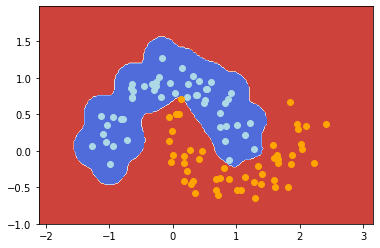

In [11]:
fig, ax = plt.subplots()

xx,yy = make_meshgrid(X_test, y_test, h=.02)

plot_contours(ax, overfit, xx, yy,colmap=plt.cm.coolwarm)

ax.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color='lightblue')
ax.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color='orange')

## Plot the decision boundary of your cross-validated classifier

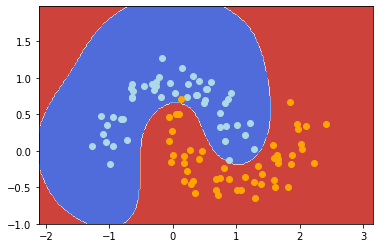

In [12]:
fig, ax = plt.subplots()

xx,yy = make_meshgrid(X_test, y_test, h=.02)

plot_contours(ax, cv, xx, yy,colmap=plt.cm.coolwarm)

ax.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color='lightblue')
ax.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color='orange')

#ax.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color='green')
#ax.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color='yellow')

# e) Play around with hyperparametes and kernels

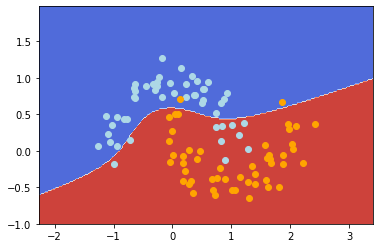

In [13]:
kernel = 'poly'
C=1e-3
gamma=1e3
custom = SVC(kernel=kernel, C=C, gamma=gamma, degree=3).fit(X_train, y_train)
#custom_cv = GridSearchCV(custom, params).fit(X_train, y_train)

fig, ax = plt.subplots()

xx,yy = make_meshgrid(X_train, y_train, h=.02)

plot_contours(ax, custom, xx, yy,colmap=plt.cm.coolwarm)

ax.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color='lightblue')
ax.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color='orange')



### Addition: Kernel Ridge Regression also works. The Laplacian kernel (arguably) performs best.

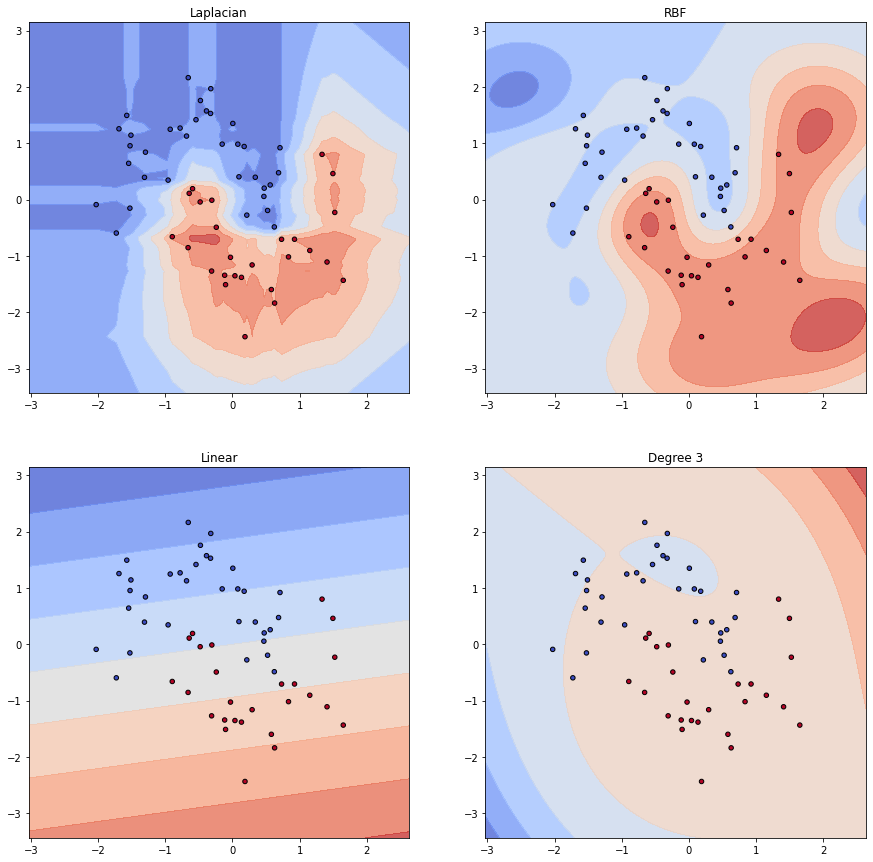

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler

X, y = make_moons(noise=0.2, random_state=1) #factor=0.5,
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

parameters = {'alpha': np.logspace(-3, 2, num=10), 'gamma': np.logspace(-3, 2, num=10)}

kr = KernelRidge(kernel='laplacian')
clf_kr = GridSearchCV(kr, parameters)
clf_kr = clf_kr.fit(X_train, y_train)

kr_rbf = KernelRidge(kernel='rbf')
clf_rbf = GridSearchCV(kr_rbf, parameters)
clf_rbf = clf_rbf.fit(X_train, y_train)

kr_lin = KernelRidge(kernel='linear')
clf_lin = GridSearchCV(kr_lin, parameters)
clf_lin = clf_lin.fit(X_train, y_train)

kr_p = KernelRidge(kernel='polynomial', degree=3)
clf_p = GridSearchCV(kr_p, parameters)
clf_p = clf_p.fit(X_train, y_train)



fig, ax = plt.subplots(2, 2, figsize=(15,15))
plot_contours(ax[0,0], clf_kr, xx, yy, colmap=plt.cm.coolwarm, alpha=0.8)
ax[0,0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax[0,0].set_title('Laplacian')

plot_contours(ax[0,1], clf_rbf, xx, yy, colmap=plt.cm.coolwarm, alpha=0.8)
ax[0,1].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax[0,1].set_title('RBF')

plot_contours(ax[1,0], clf_lin, xx, yy, colmap=plt.cm.coolwarm, alpha=0.8)
ax[1,0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax[1,0].set_title('Linear')

plot_contours(ax[1,1], clf_p, xx, yy, colmap=plt.cm.coolwarm, alpha=0.8)
ax[1,1].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax[1,1].set_title('Degree 3')

plt.show()

# Assignment 7 - Exercise 3

## a) Complete the implementation of kernel_regression and random_feature_regression

In [22]:
from sklearn.linear_model import LinearRegression
# for lack of specification we will be using least-squares loss here
def arccos_kernel(x1, x2):

    assert len(x1.shape)==2 and len(x2.shape)==2, "Requires 2D-array. If passing single sample run .reshape(1,-1)"

    u = (x1 @ x2.T) / np.outer(np.linalg.norm(x1.T, axis=0), np.linalg.norm(x2.T, axis=0))

    # due to some rounding errors, u was occasionally >1, where arccos is not defined
    # therefore it is here clipped to be at least -1 and at most +1
    u = u.clip(min=-1, max=1)

    K = 1/np.pi * (u * (np.pi - np.arccos(u))) - np.sqrt(1-u**2)

    assert K.shape == (x1.shape[0], x2.shape[0])

    return K

def kernel_regression(X_train, Y_train):
    n, d = X_train.shape
    
    K = arccos_kernel(X_train, X_train)
    assert K.shape == (n,n)
    
    alphas = (np.linalg.inv(K) @ Y_train).reshape(-1)
    
    def kernel_predictor(x):
        K_xX = arccos_kernel(x,X_train)
        prediction = (K_xX @ alphas).reshape(-1,1)
        return prediction
    
    return kernel_predictor


def random_feature_regression(X_train, Y_train, l):  
    n, d = X_train.shape
    
    # gernerating the features
    np.random.seed(10)
    W = np.random.normal(size=(d, l), loc=0, scale=1)
    
    Phi_X = (X_train @ W) 
    Phi_X = np.maximum(np.zeros_like(Phi_X), Phi_X) * (1/np.sqrt(l))

    assert Phi_X.shape == (n,l), f"Desired shape: {(n,l)}, actual shape: {Phi_X.shape}"

    # calulating weights
    alphas = np.linalg.pinv(Phi_X.T @ Phi_X) @ (Phi_X.T @ Y_train) # Only problem was np.linalg.pinv instead of np.linalg.inv
    
    assert alphas.shape == (l,1),f"Desired shape: {(l,1)}, actual shape: {alphas.shape}"
    
    norm = np.linalg.norm(alphas) / np.sqrt(d)
    
    def random_feature_predictor(x):
        
        Phi_x = (x @ W)
        Phi_x = np.maximum(np.zeros_like(Phi_x), Phi_x) * (1/np.sqrt(l))

        assert Phi_x.shape == (x.shape[0], l), f"Desired shape: {(x.shape[0], l)}, actual shape: {Phi_x.shape}"
        
        prediction = (Phi_x @ alphas)
        
        return prediction
    
    return random_feature_predictor, norm



## b) Plot train error, test error, and the function norm of random feature regression for multiple overparameterization ratios.

In [16]:
def generate_data(num_samples, dim):
    X = np.random.standard_normal((num_samples, dim))
    regression_param = np.random.standard_normal((dim, 1))
    regression_param /= np.linalg.norm(regression_param)
    noise = 0.2 * np.random.standard_normal((num_samples, 1))
    Y = X @ regression_param + noise
    return X, Y

In [17]:
X, Y = generate_data(num_samples=600, dim=50)
X_train, Y_train = X[:300], Y[:300]
X_test, Y_test = X[300:], Y[300:]
X_test.shape

(300, 50)

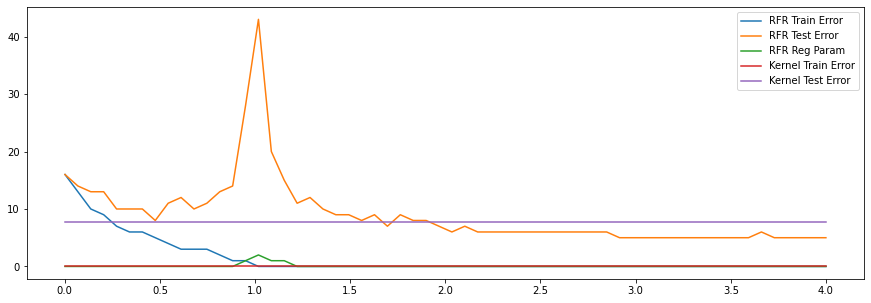

In [18]:
overparam_ratios = np.linspace(.001, 4, 60)

n,d = X_train.shape
ls = (overparam_ratios * n).astype(int) + 1

kernel_predictor = kernel_regression(X_train, Y_train)

kernel_train_l2 = np.linalg.norm(kernel_predictor(X_train) - Y_train)
kernel_test_l2 = np.linalg.norm(kernel_predictor(X_test) - Y_test)

lin_train_l2s = np.zeros_like(ls)
lin_test_l2s = np.zeros_like(ls)
regr_params = np.zeros_like(ls)

for i,l in enumerate(ls):
    random_feature_predictor, norm = random_feature_regression(X_train, Y_train, l)
    
    lin_train_l2s[i] = np.linalg.norm(random_feature_predictor(X_train) - Y_train)
    lin_test_l2s[i] = np.linalg.norm(random_feature_predictor(X_test) - Y_test)
    regr_params[i] = norm
    


fig, ax = plt.subplots(figsize=(15,5))
ax.plot(overparam_ratios, lin_train_l2s, label="RFR Train Error")
ax.plot(overparam_ratios, lin_test_l2s, label="RFR Test Error")
ax.plot(overparam_ratios, regr_params, label="RFR Reg Param")
ax.plot(overparam_ratios, np.ones_like(ls) * kernel_train_l2, label="Kernel Train Error")
ax.plot(overparam_ratios, np.ones_like(ls) * kernel_test_l2, label="Kernel Test Error")
ax.legend()
plt.show()

## c) Discuss the results

### (i)
The complexity of the hypothesis class increases with increasing overparameterization ratio $\gamma = \frac{l}{n}$. The number of variables increases since the featue vectors get larger. The number of contraints stays the same.

### (ii) 
$\gamma < 1$ shows the expected behavior of the bias-variance trade-off: with increasing $\gamma$ (increasing complexity) the train error goes to zero (overfitting the training data). The test error first goes down and then increases fast as soon as the model overfits.

### (iii)
At the interpolation threshold there is a peak of the test error, corresponding to the worst model performance .

### (iv) 
for $\gamma > 1$ the test error surprisingly goes down again, showing the double descent phenomenon: with increasing features the test error goes down until $\gamma \rightarrow 1$. However, with a number of further increasing features the test error decreases again. When only taking the test error as a measure, it seems like overparameterization in terms does not hurt in this case.

An additiional inductive bias is similar to the Occam´s Razor: When considering larger function classes, more interpolating predictors are contained. That also means that we can find simpler (less complex) predictors that are interpolating as well.

## d) Complete the implementation of nadaraya_watson_regression and visualize the resulting predictor.

In [19]:
def nadaraya_watson_regression(X_train, Y_train, m):
    
    def singular_kernel(x1, x2):
    
        K = np.zeros((x1.shape[0], x2.shape[0]))

        for i, x1_i in enumerate(x1):
            for j, x2_j in enumerate(x2):
                K[i,j] = 1/np.linalg.norm(x1_i - x2_j)

        assert K.shape == (x1.shape[0], x2.shape[0])
        return K
    
    def nw_predictor(x):
        K_xX = singular_kernel(x, X_train)
        pred = np.zeros(x.shape[0])
        for i, x_i in enumerate(x):
            indices = np.argsort(K_xX[i])
            m_K_xX = K_xX[i,indices[-m:]]
            m_Y = Y_train[indices[-m:]]
            pred[i] = (m_Y * m_K_xX).sum() / m_K_xX.sum() * 1/m 
            # i have added this 1/m to actually make this a weighted average
            
        return pred
    return nw_predictor

In [20]:
def generate_1d_data(num_samples):
    x = np.random.uniform(0, 1, (num_samples, 1))
    noise = .1 * np.random.standard_normal((num_samples, 1))
    y = x + noise
    return x, y


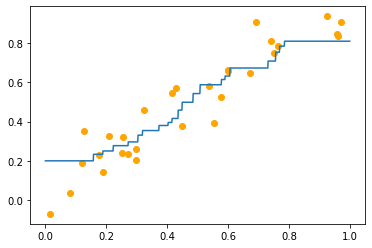

In [21]:
X, Y = generate_1d_data(num_samples=30)
grid = np.linspace(0, 1, 1000)

predictor = nadaraya_watson_regression(X, Y, 10)

fig, ax = plt.subplots()
ax.plot(grid, predictor(grid))
ax.scatter(X, Y, color='orange')